In [20]:
import preprocessing as prep
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt

In [22]:
path_list = [
    "../00_Data/testset_2015_1h/2015082215",
    "../00_Data/testset_2015_1h/2015092215",
    "../00_Data/testset_2015_1h/2015102215"
]

## Gibt es innerhalb eines Frames (pro Kamera) gleiche IDs?

In [16]:
for p in path_list:

    print("{}".format(p))
    for i in list(range(4)):
        fc = prep.get_fc(p, i)
        df = prep.get_dataframe(fc)
        df = prep.calcIds(df, 0.9)
        df = df.reset_index(level=1).reset_index(level=1).reset_index(level=1)
        gr = df.groupby(['frame_idx'])
        id_unique = gr['id'].aggregate(lambda x: x.nunique())
        id_sizes = gr['id'].size()
        df_id_unique = DataFrame({'uniques': id_unique, 'sizes': id_sizes})
        df_id_unique['diff'] = df_id_unique.sizes - df_id_unique.uniques
        num = df_id_unique[df_id_unique['diff'] > 0].shape[0]
        print("{} - {} frames contain not unique IDs".format(i,num))

../00_Data/testset_2015_1h/2015082215

### file ../00_Data/testset_2015_1h/2015082215 cam 0
0 - 73 frames contain not unique IDs

### file ../00_Data/testset_2015_1h/2015082215 cam 1
1 - 0 frames contain not unique IDs

### file ../00_Data/testset_2015_1h/2015082215 cam 2
2 - 0 frames contain not unique IDs

### file ../00_Data/testset_2015_1h/2015082215 cam 3
3 - 12 frames contain not unique IDs
../00_Data/testset_2015_1h/2015092215

### file ../00_Data/testset_2015_1h/2015092215 cam 0
0 - 3 frames contain not unique IDs

### file ../00_Data/testset_2015_1h/2015092215 cam 1
1 - 10 frames contain not unique IDs

### file ../00_Data/testset_2015_1h/2015092215 cam 2
2 - 6 frames contain not unique IDs

### file ../00_Data/testset_2015_1h/2015092215 cam 3
3 - 2 frames contain not unique IDs
../00_Data/testset_2015_1h/2015102215

### file ../00_Data/testset_2015_1h/2015102215 cam 0
0 - 0 frames contain not unique IDs

### file ../00_Data/testset_2015_1h/2015102215 cam 1
1 - 0 frames contai

## Gibt es innerhalb eines Frames (alle Kamera) gleiche IDs?

../00_Data/testset_2015_1h/2015082215

### file ../00_Data/testset_2015_1h/2015082215 cam 0

### file ../00_Data/testset_2015_1h/2015082215 cam 1

### file ../00_Data/testset_2015_1h/2015082215 cam 2

### file ../00_Data/testset_2015_1h/2015082215 cam 3
count    1024.000000
mean       14.102539
std         3.686682
min         5.000000
25%        11.000000
50%        14.000000
75%        17.000000
max        28.000000
Name: diff, dtype: float64


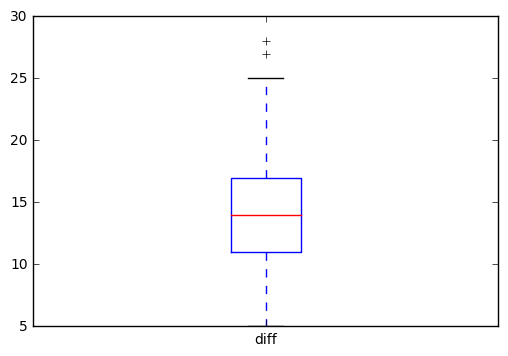

../00_Data/testset_2015_1h/2015092215

### file ../00_Data/testset_2015_1h/2015092215 cam 0

### file ../00_Data/testset_2015_1h/2015092215 cam 1

### file ../00_Data/testset_2015_1h/2015092215 cam 2

### file ../00_Data/testset_2015_1h/2015092215 cam 3
count    1024.000000
mean        4.300781
std         1.744523
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        11.000000
Name: diff, dtype: float64


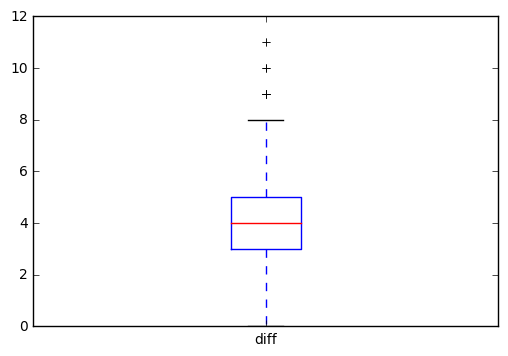

../00_Data/testset_2015_1h/2015102215

### file ../00_Data/testset_2015_1h/2015102215 cam 0

### file ../00_Data/testset_2015_1h/2015102215 cam 1

### file ../00_Data/testset_2015_1h/2015102215 cam 2

### file ../00_Data/testset_2015_1h/2015102215 cam 3
count    1024.000000
mean        1.072266
std         0.807257
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: diff, dtype: float64


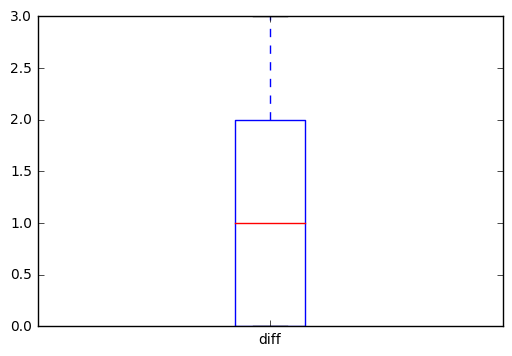

In [23]:
for p in path_list:

    print("{}".format(p))

    df_all = DataFrame()
    for i in list(range(4)):
        fc = prep.get_fc(p, i)
        df = prep.get_dataframe(fc)
        df = prep.calcIds(df, 0.9)
        
        df = df.reset_index(level=1).reset_index(level=1).reset_index(level=1)
        df_all = pd.concat([df_all, df])

    
    gr = df_all.groupby(['frame_idx'])
    id_unique = gr['id'].aggregate(lambda x: x.nunique())
    id_sizes = gr['id'].size()
    df_id_unique = DataFrame({'uniques': id_unique, 'sizes': id_sizes})
    df_id_unique['diff'] = df_id_unique.sizes - df_id_unique.uniques
    
    print(df_id_unique['diff'].describe())
    df_id_unique['diff'].plot.box()
    plt.show()
    